## PyPharmaceuticals
This script takes cancer study data in mice and summarizes drug effectiveness by graphing the results.Error was calculated using the standard error.


### Analysis:
    1. Ramicane and Capomulin are the only drugs that reduced tumor growth
    2. Ramicane and Capomulin saw the highest survival rates and lowest metastatic site growth
    3. Placebo performed similary to the drugs other than Ramicane and Capomulin 

In [159]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [160]:
mouse_data=pd.read_csv("mouse_drug_data.csv",encoding="utf-8")
trial_data=pd.read_csv("clinicaltrial_data.csv",encoding="utf-8")
mouse_df=pd.DataFrame(mouse_data)
trial_df=pd.DataFrame(trial_data)

In [161]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [162]:
trial_df.head()
mouse_trial_df=pd.merge(mouse_df,trial_df,how="inner",on="Mouse ID")
mouse_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Tumorsize Over Time

In [163]:
stdtumorsize=mouse_trial_df["Tumor Volume (mm3)"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).std().unstack()
stdtumorsize_cols=list(stdtumorsize.columns)
stdtumorsize

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,1.175512,1.270025,0.970606,1.068422,1.158540,2.414777,1.199312,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.804167,3.528366,2.079848,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.921818,3.774331,2.365597,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.289070,3.770480,2.849853,2.198367
25,4.135268,1.864031,2.334787,3.292768,3.452264,4.266887,2.160438,3.582445,3.233965,2.410052
30,4.383004,1.962481,2.601931,3.963139,3.778081,4.718189,2.689902,4.147942,3.816460,3.098552
35,4.935447,2.590153,3.409213,4.650315,3.926309,4.817311,3.430847,4.433337,4.012745,3.297993
40,5.607278,2.650983,3.336898,4.486653,4.332193,4.748016,4.694337,5.046561,4.885891,3.736102


In [164]:
semtumorsize=mouse_trial_df["Tumor Volume (mm3)"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).sem().unstack()
semtumorsize_cols=list(semtumorsize.columns)
semtumorsize

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [165]:
#Tumor volume changes over time for each treatment
tumorsize=mouse_trial_df["Tumor Volume (mm3)"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).mean().unstack()
tumorsize_cols=list(tumorsize.columns) #create a list of the drugs in tumorsize df
tumorsize


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [166]:
# #create a for loop for all the drugs
# for i in range(len(tumorsize_columns)):
#     capplot=plt.scatter(tumorsize.index,tumorsize[tumorsize_columns[i]])#,marker="^",facecolors="red",alpha=0.75
# plt.show()

In [167]:
font={'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

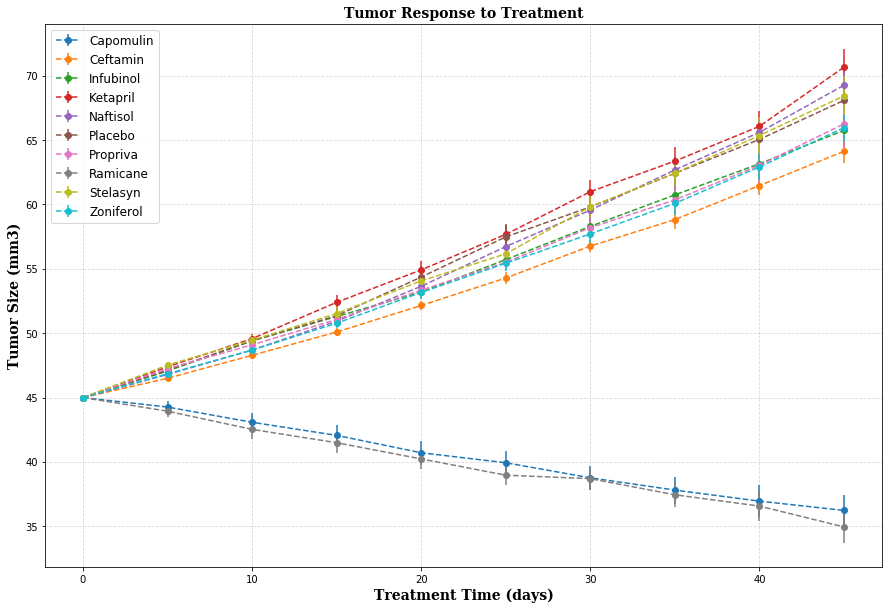

In [168]:
plt.figure(figsize=(15,10))
for i in range(len(tumorsize_cols)):
    capplot=plt.errorbar(tumorsize.index,tumorsize[tumorsize_cols[i]],semtumorsize[tumorsize_cols[i]],xerr=None,fmt='--o')
plt.title("Tumor Response to Treatment",fontdict=font)
plt.xlabel("Treatment Time (days)",fontdict=font)
plt.ylabel("Tumor Size (mm3)",fontdict=font)
plt.legend(loc="upper left",prop={'size':'large'})
plt.grid(alpha=0.5,linestyle='--')
plt.show()

### MetaStatic Sites Over Time

In [169]:
metasites=mouse_trial_df["Metastatic Sites"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).mean().unstack()
metasites_cols=list(metasites.columns)
metasites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [170]:
semmetasites=mouse_trial_df["Metastatic Sites"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).sem().unstack()
semmetasites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


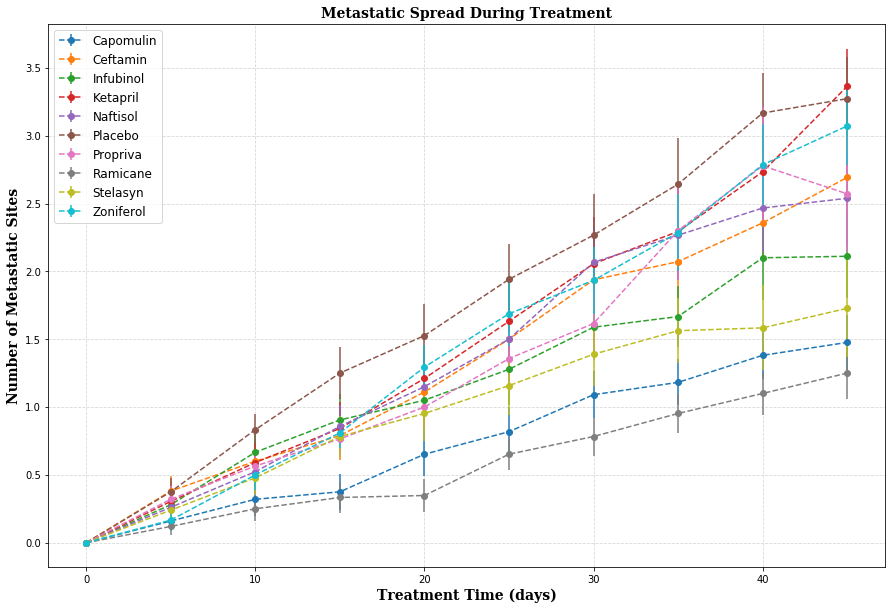

In [171]:
plt.figure(figsize=(15,10))
for i in range(len(tumorsize_cols)):
    capplot=plt.errorbar(metasites.index,metasites[metasites_cols[i]],semmetasites[metasites_cols[i]],xerr=None,fmt='--o')
plt.title("Metastatic Spread During Treatment",fontdict=font)
plt.xlabel("Treatment Time (days)",fontdict=font)
plt.ylabel("Number of Metastatic Sites",fontdict=font)
plt.legend(loc="upper left",prop={'size':'large'})
plt.grid(alpha=0.5,linestyle='--')
plt.show()

In [172]:
micecount=mouse_trial_df["Mouse ID"].groupby([mouse_trial_df["Timepoint"],mouse_trial_df["Drug"]]).count().unstack()
micecount
micecount_cols=list(micecount.columns)

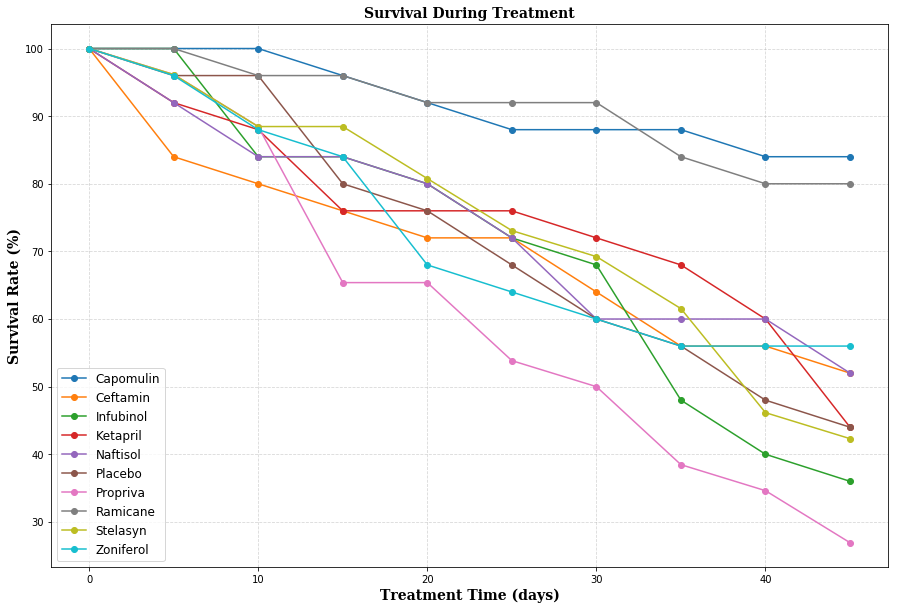

In [173]:
plt.figure(figsize=(15,10))
for i in range(len(micecount_cols)):
    capplot=plt.plot(micecount.index,((micecount[micecount_cols[i]]/micecount[micecount_cols[i]][0])*100),'-o')
plt.title("Survival During Treatment",fontdict=font)
plt.ylabel("Survival Rate (%)",fontdict=font)
plt.xlabel("Treatment Time (days)",fontdict=font)
plt.legend(loc="lower left",prop={'size':'large'})
plt.grid(alpha=0.5,linestyle='--')
plt.show()

### Average Tumor Change Over Treatment Time

In [174]:
mouse_trial_df.head()
tumorsize

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [175]:
#Average tumor size at 0 compared to avg tumorsize at day 45-- Size(45)-Size(0)/Size(0)
tumor_change=[]
lstindex=tumorsize.index[len(tumorsize.index)-1]
fstindex=tumorsize.index[0]

for i in range(len(tumorsize_cols)):
    tumor_change.append(((tumorsize[tumorsize_cols[i]][lstindex]-tumorsize[tumorsize_cols[i]][fstindex])/tumorsize[tumorsize_cols[i]][fstindex])*100)
tumor_change_df=pd.DataFrame({"Drug": tumorsize_cols,"Tumor Growth":tumor_change})
tumor_change_df=tumor_change_df.sort_values("Tumor Growth")
tumor_change_df.set_index("Drug",drop=True,append=False,inplace=True)
colors=np.where(tumor_change_df["Tumor Growth"] > 0,"r","g")
heights=list(np.where(tumor_change_df["Tumor Growth"] > 0, 1,-3))
colors="".join(colors)

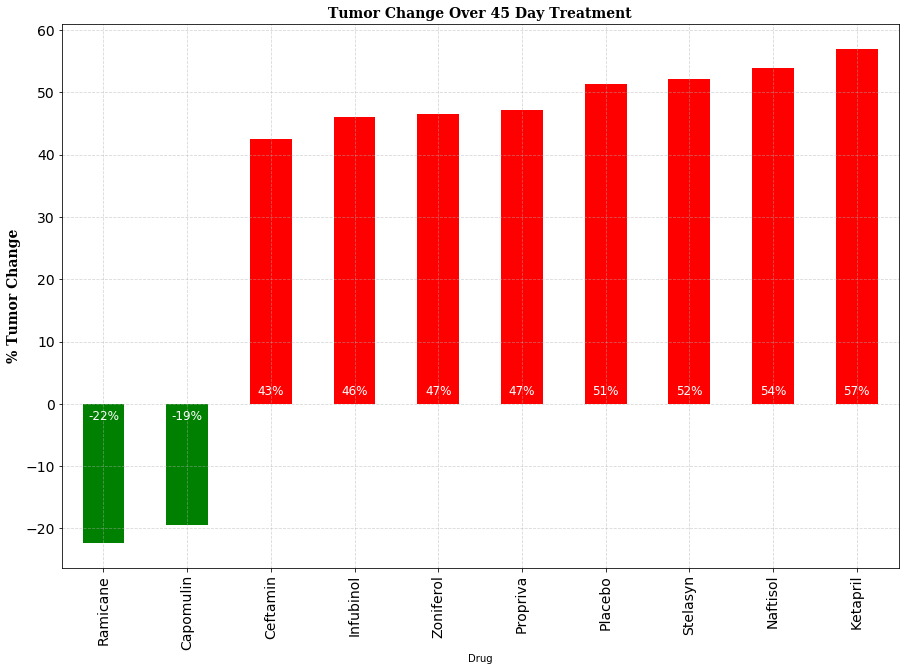

In [177]:
plt.figure(figsize=(15,10))
tumplot=tumor_change_df["Tumor Growth"].plot.bar(color=colors,fontsize=14)
tumplot.grid(alpha=0.5,linestyle='--')
plt.title("Tumor Change Over 45 Day Treatment",fontdict=font)
plt.ylabel("% Tumor Change",fontdict=font)   

rects=tumplot.patches # get rectangles from graph
datalabels=list(tumor_change_df["Tumor Growth"])
datalabels=["{:.0f}%".format(label) for label in datalabels]

for height,rect,label in zip(heights,rects,datalabels):
    plt.text(rect.get_x()+rect.get_width()/2,height,label,horizontalalignment="center",verticalalignment="bottom",fontsize=12,color="white")
plt.show()